# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [2]:
# Your code to explore the data
df = df_flights.copy()
#df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

# Cleaning Data

## Handle Nulls

In [4]:
# check for nulls
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

DepDel15 had 2761 null values. I need to check to see both DepDelay and DepDel15 columns to see if I can impute any values that may have a descrepancy.

In [5]:
df[df.DepDel15.isnull()][['DepDelay','DepDel15']].sum()

DepDelay    0.0
DepDel15    0.0
dtype: float64

All the values are 0 telling me that these flights were on time. I'm going to look at the rest of the dataframe to see if any other values in DepDelay are 0 as well

In [6]:
df[df.DepDelay == 0][['DepDelay','DepDel15']].sum()

DepDelay    0.0
DepDel15    0.0
dtype: float64

In [7]:
# Seems like the data is consistent so I'll fill the null values with 0
df = df.fillna(0)
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Remove Outliers
- DepDelay and ArrDelay columns

<Figure size 648x1152 with 0 Axes>

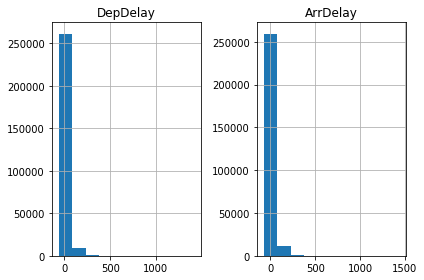

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,16))

df[['DepDelay', 'ArrDelay']].hist()
plt.tight_layout()

In [9]:
# summary statistics
df[['DepDelay', 'ArrDelay']].describe().T

,count,mean,std,min,25%,50%,75%,max
DepDelay,271940.0,10.350449,35.673710,-63.0,-4.0,-1.0,9.0,1425.0
ArrDelay,271940.0,6.496650,38.230331,-75.0,-11.0,-3.0,10.0,1440.0


Text(0.5, 1.0, 'Arrival Delay')

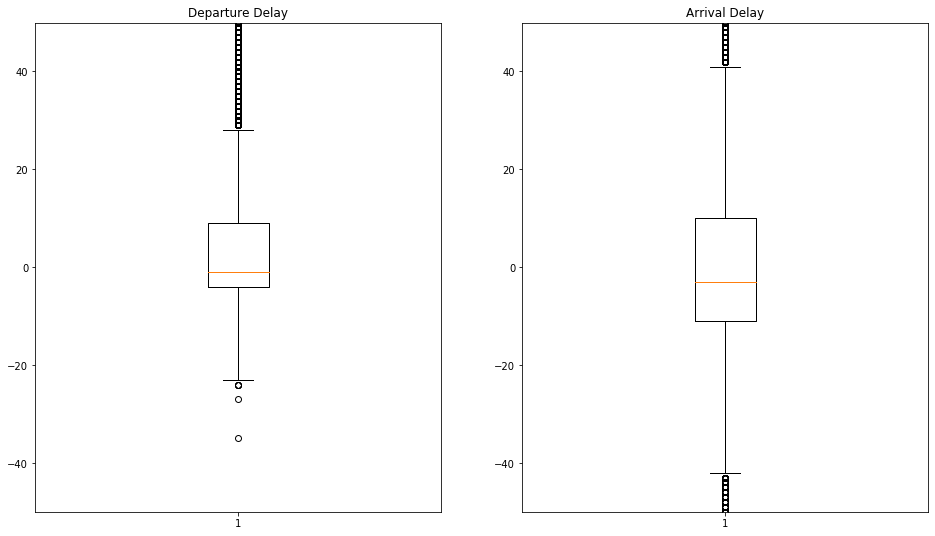

In [10]:
# Look at the box plots of each column to see where the cutoffs are for outliers
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.boxplot(df.DepDelay)
plt.ylim(-50, 50)
plt.title('Departure Delay')

plt.subplot(122)
plt.boxplot(df.ArrDelay)
plt.ylim(-50, 50)
plt.title('Arrival Delay')

*Going to eyeball these boundaries for outliers*

Departure Delay
- lower bound: -22
- upper bound: 34

Arrival Delay
- lower bound: -41
- upper bound: 40

### Outliers Removed

In [11]:
df = df[(df.DepDelay > -22) 
   & (df.DepDelay < 34)
  & (df.ArrDelay > -41)
  & (df.ArrDelay < 40)]

# Explore Data
## New Summary Statistics

In [12]:
df[['DepDelay', 'ArrDelay']].describe().T

,count,mean,std,min,25%,50%,75%,max
DepDelay,238394.0,0.855680,8.830914,-21.0,-5.0,-2.0,3.0,33.0
ArrDelay,238394.0,-3.628149,13.211068,-40.0,-12.0,-5.0,4.0,39.0


## Distribution of Delay Times

<Figure size 648x1152 with 0 Axes>

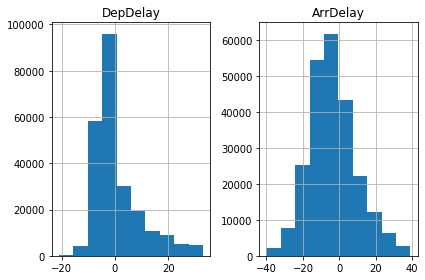

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,16))

df[['DepDelay', 'ArrDelay']].hist()
plt.tight_layout()

**Data is more 'normally distributed'**

Text(0.5, 1.0, 'Arrival Delay')

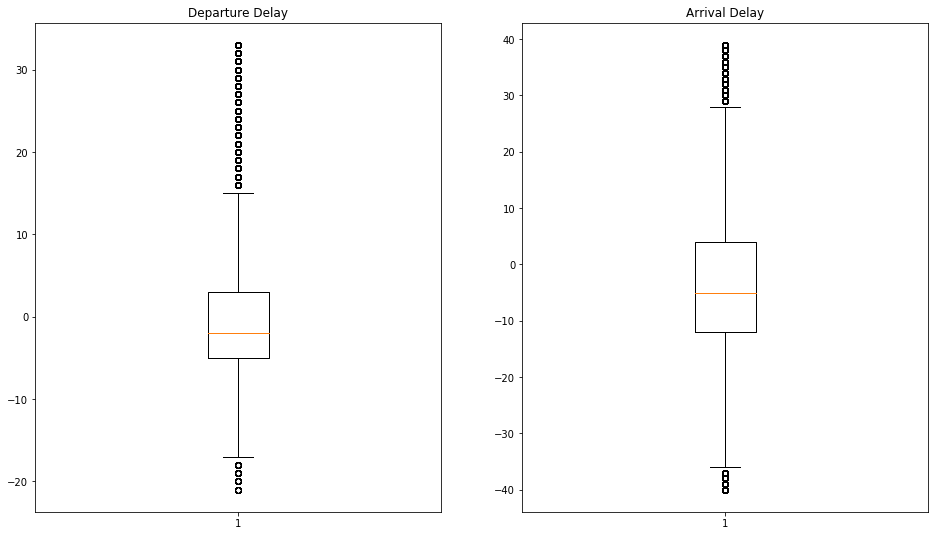

In [14]:
# lets look at the new boxplots
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.boxplot(df.DepDelay)
#plt.ylim(-50, 50)
plt.title('Departure Delay')

plt.subplot(122)
plt.boxplot(df.ArrDelay)
#plt.ylim(-50, 50)
plt.title('Arrival Delay')

### What are the average (mean) departure and arrival delays?

In [15]:
mean_values = df[['DepDelay', 'ArrDelay']].mean()
mean_values

DepDelay    0.855680
ArrDelay   -3.628149
dtype: float64

Text(0.5, 1.0, 'Mean Departure and Arrival Times')

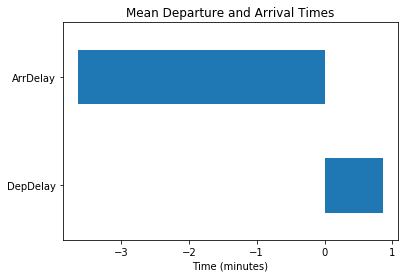

In [16]:
mean_values.plot(kind='barh')
plt.xlabel('Time (minutes)')
plt.title('Mean Departure and Arrival Times')

### How do the carriers compare in terms of arrival delay performance?

In [17]:
df.Carrier.value_counts()

WN    50849
DL    34998
AA    24982
UA    24630
US    21384
OO    14375
EV    13204
B6    10341
MQ     9494
FL     8277
9E     6938
AS     6399
YV     4597
F9     3090
VX     3019
HA     1817
Name: Carrier, dtype: int64

In [27]:
#taking a random sample since 200,000 plus rows takes forever to run
#df_sample = df.sample(1000, random_state=123)

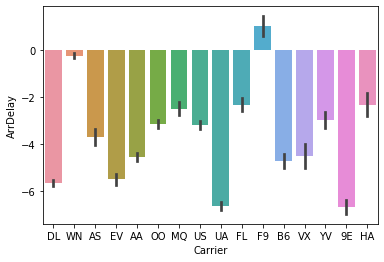

In [26]:
import seaborn as sns

sns.barplot(data=df, x='Carrier', y='ArrDelay')

### Is there a noticable difference in arrival delays for different days of the week?

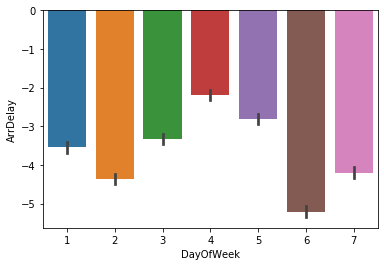

In [25]:
sns.barplot(data=df, x='DayOfWeek', y='ArrDelay')

### Which departure airport has the highest average departure delay?

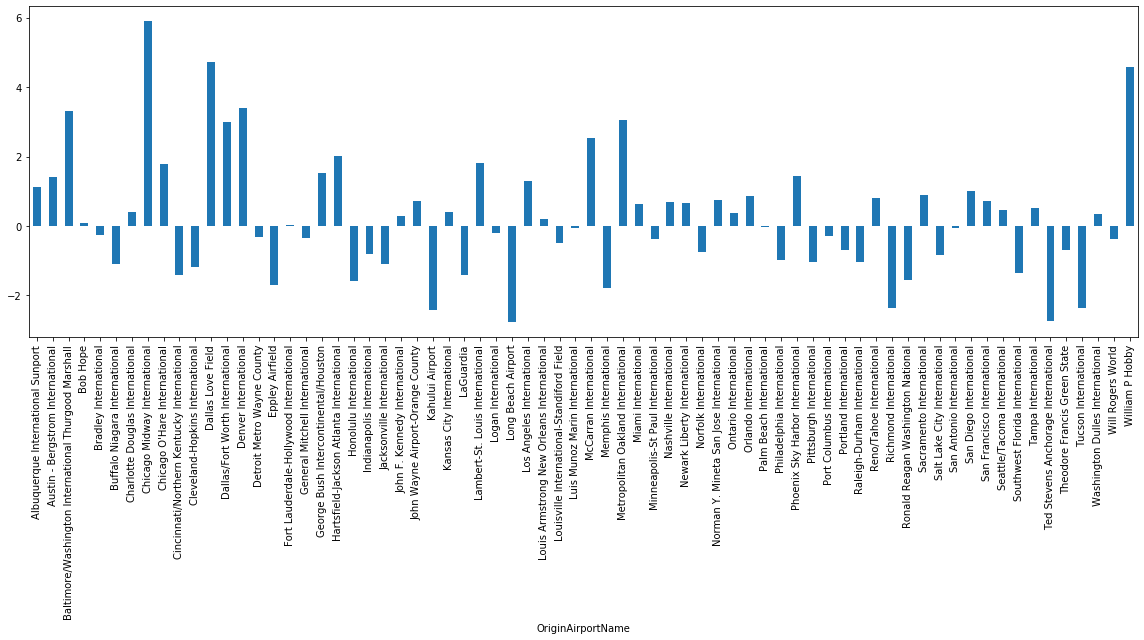

In [31]:
plt.figure(figsize=(16,9))
df.groupby('OriginAirportName').DepDelay.mean().plot(kind='bar')
plt.tight_layout()

In [35]:
df.groupby('OriginAirportName').DepDelay.mean().sort_values(ascending=False).head(1)

OriginAirportName
Chicago Midway International    5.89067
Name: DepDelay, dtype: float64

### Do late departures tend to result in longer arrival delays than on-time departures?

In [52]:
# Splitting up late and on-time data into separate variables
late_departures = df[df.DepDelay > 0].ArrDelay
on_time_departures = df[df.DepDelay <= 0].ArrDelay
on_time_departures

2         -7
4         -9
6         -3
14       -15
15        26
          ..
271929    -6
271932     0
271933   -11
271934   -12
271938    -6
Name: ArrDelay, Length: 158731, dtype: int64

Text(0.5, 1.0, 'Distribution of Arrival Delays by On-time Departures')

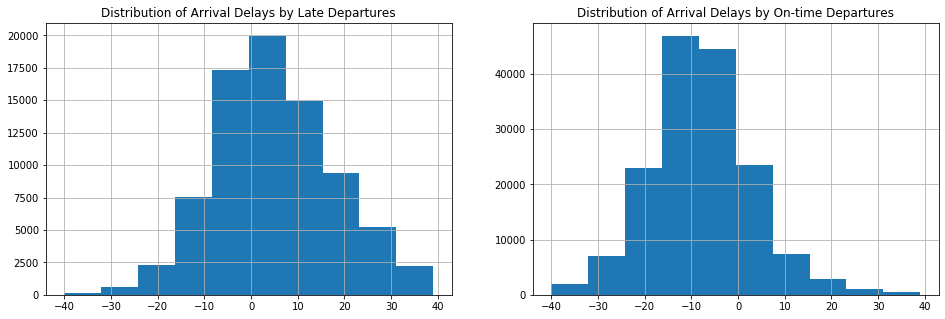

In [55]:
# Distribrutions
plt.figure(figsize=(16,5))

plt.subplot(121)
late_departures.hist()
plt.title('Distribution of Arrival Delays by Late Departures')

plt.subplot(122)
on_time_departures.hist()
plt.title('Distribution of Arrival Delays by On-time Departures')

**Looks like most arrival delays are LARGER for on-time departures**

### Which route (from origin airport to destination airport) has the most late arrivals?

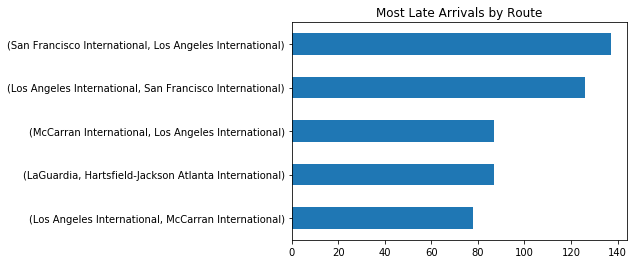

In [83]:
pd.DataFrame(
    df.groupby(['OriginAirportName', 'DestAirportName']).ArrDel15.sum()).sort_values(
        by='ArrDel15', ascending=True).tail().plot(
            kind='barh', xlabel='', title='Most Late Arrivals by Route', legend='')

### Which route has the highest average arrival delay?

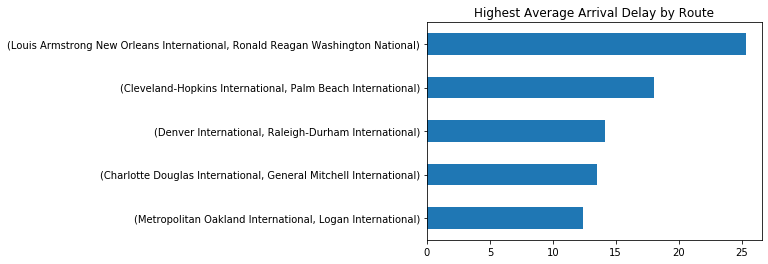

In [81]:
pd.DataFrame(
    df.groupby(['OriginAirportName', 'DestAirportName']).ArrDelay.mean()).sort_values(
        by='ArrDelay', ascending=True).tail().plot(
            kind='barh', xlabel='', title='Highest Average Arrival Delay by Route', legend='')